In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Read Data

In [236]:
df = pd.read_csv('Beras Premium Train.csv')
df

,Date,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
0,2022-01-01,12080.0,11500.0,11210.0,11350.0,11250.0,12660.0,11230.0,12090.0,11580.0,...,14810.0,14300.0,11320.0,10930.0,11680.0,11890.0,12170.0,13410.0,11540.0,12720.0
1,2022-01-02,12020.0,11500.0,11210.0,11400.0,11250.0,12660.0,11290.0,11980.0,11600.0,...,15310.0,14370.0,11430.0,10920.0,11390.0,11870.0,12240.0,13340.0,11630.0,12710.0
2,2022-01-03,11990.0,11500.0,11290.0,11370.0,11210.0,12390.0,11230.0,12130.0,11620.0,...,15000.0,14340.0,11350.0,10890.0,11630.0,11730.0,12070.0,13240.0,11510.0,12510.0
3,2022-01-04,12050.0,11630.0,11210.0,11410.0,11210.0,12390.0,11330.0,12090.0,11610.0,...,15000.0,14460.0,11300.0,10920.0,11630.0,11720.0,12070.0,13310.0,11460.0,12450.0
4,2022-01-05,12180.0,11670.0,11250.0,11590.0,11050.0,12390.0,11350.0,12130.0,11610.0,...,14820.0,14470.0,11350.0,10890.0,11630.0,11860.0,11980.0,13300.0,11490.0,12430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2024-09-26,14680.0,15530.0,14610.0,15480.0,14400.0,15540.0,15170.0,14990.0,14800.0,...,17940.0,16350.0,14510.0,14530.0,15440.0,14620.0,15180.0,17470.0,14090.0,15360.0
1000,2024-09-27,14620.0,15530.0,14650.0,15480.0,14380.0,16020.0,15210.0,14990.0,14830.0,...,17990.0,16300.0,14350.0,14560.0,15520.0,14400.0,15120.0,17580.0,14140.0,15380.0
1001,2024-09-28,14650.0,15530.0,14780.0,15480.0,14380.0,15540.0,15210.0,14990.0,14800.0,...,17990.0,16300.0,14460.0,14530.0,15500.0,14400.0,15190.0,17540.0,14150.0,15420.0
1002,2024-09-29,14660.0,15530.0,14750.0,15480.0,14400.0,15540.0,15210.0,14990.0,14820.0,...,17940.0,16320.0,14460.0,14520.0,15450.0,14360.0,15120.0,17540.0,14150.0,15440.0


Mengambil hanya kolom papua

In [237]:
df_papua = df[['Date', 'Papua']]
df_papua

,Date,Papua
0,2022-01-01,14810.0
1,2022-01-02,15310.0
2,2022-01-03,15000.0
3,2022-01-04,15000.0
4,2022-01-05,14820.0
...,...,...
999,2024-09-26,17940.0
1000,2024-09-27,17990.0
1001,2024-09-28,17990.0
1002,2024-09-29,17940.0


# Missing Value

In [238]:
df_papua.isnull().sum()

Date      0
Papua    37
dtype: int64

In [239]:
# Drop baris yang mengandung missing value
df_cleaned = df_papua.dropna(axis=0)
df_cleaned.isnull().sum()

Date     0
Papua    0
dtype: int64

In [240]:
# Cek ukuran dataset setelah pembersihan
df_cleaned.shape

(967, 2)

# Format ke datetime

In [241]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1003
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    967 non-null    object 
 1   Papua   967 non-null    float64
dtypes: float64(1), object(1)
memory usage: 22.7+ KB


In [242]:
# Mengubah kolom date ke format datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%Y-%m-%d')

/tmp/ipykernel_4923/1524545602.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [243]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1003
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    967 non-null    datetime64[ns]
 1   Papua   967 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.7 KB


In [244]:
df_cleaned

,Date,Papua
0,2022-01-01,14810.0
1,2022-01-02,15310.0
2,2022-01-03,15000.0
3,2022-01-04,15000.0
4,2022-01-05,14820.0
...,...,...
999,2024-09-26,17940.0
1000,2024-09-27,17990.0
1001,2024-09-28,17990.0
1002,2024-09-29,17940.0


# Mengurutkan Dataset

In [245]:
df_cleaned.sort_values(by='Date', inplace=True)
df_cleaned

/tmp/ipykernel_4923/787186294.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Papua
0,2022-01-01,14810.0
1,2022-01-02,15310.0
2,2022-01-03,15000.0
3,2022-01-04,15000.0
4,2022-01-05,14820.0
...,...,...
999,2024-09-26,17940.0
1000,2024-09-27,17990.0
1001,2024-09-28,17990.0
1002,2024-09-29,17940.0


# EDA

In [246]:
# Pilih renderer yang cocok untuk notebook
pio.renderers.default = "notebook_connected"

px.line(
    df_cleaned,
    x="Date",
    y="Papua",
    title="Grafik Historis Harga Beras Premium Papua"
)

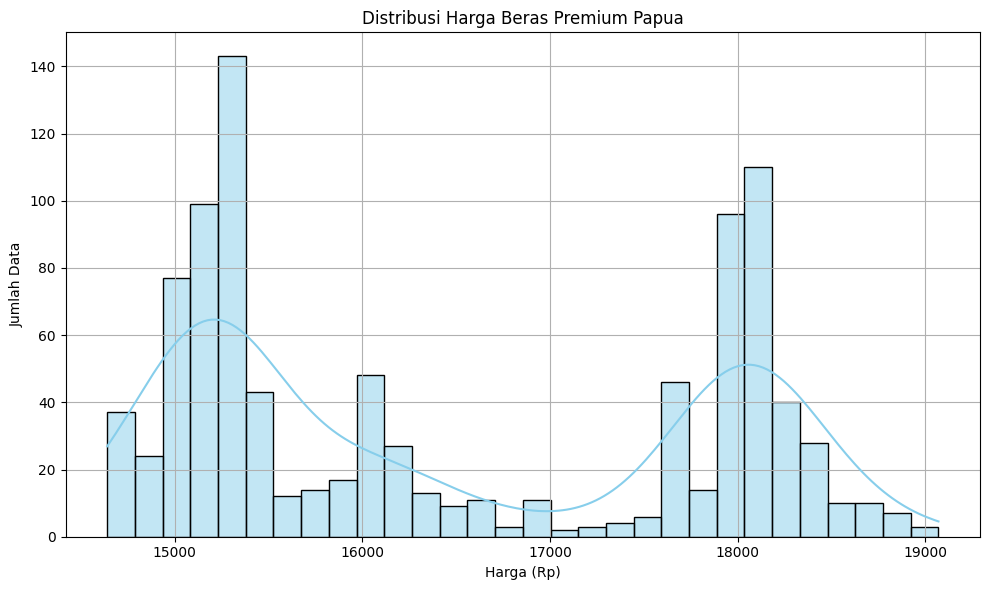

In [247]:
# Visualisasi distribusi harga beras premium Papua
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['Papua'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Harga Beras Premium Papua')
plt.xlabel('Harga (Rp)')
plt.ylabel('Jumlah Data')
plt.grid(True)
plt.tight_layout()
plt.show()

# Normalisasi Data

In [248]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_cleaned['Papua'] = scaler.fit_transform(df_cleaned[['Papua']])
df_cleaned

/tmp/ipykernel_4923/15158275.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Papua
0,2022-01-01,0.038375
1,2022-01-02,0.151242
2,2022-01-03,0.081264
3,2022-01-04,0.081264
4,2022-01-05,0.040632
...,...,...
999,2024-09-26,0.744921
1000,2024-09-27,0.756208
1001,2024-09-28,0.756208
1002,2024-09-29,0.744921


# Splitting Data

Membagi data menjadi 30 hari untuk data test dan sisanya data training

In [249]:
data_test_len = 30
data_train_len = len(df_cleaned) - data_test_len

data_train = df_cleaned[:data_train_len]
data_test = df_cleaned[data_train_len:]

print(f"Data latih: {data_train.shape[0]} baris")
print(f"Data uji: {data_test.shape[0]} baris")

Data latih: 937 baris
Data uji: 30 baris


In [250]:
# Fungsi untuk membuat dataset dengan pendekatan sliding window
def create_sequences(data, timesteps=60):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:(i+timesteps), 0])
        y.append(data[i+timesteps, 0])
    return np.array(X), np.array(y)

In [251]:
# Membuat sequence
X, y = create_sequences(data_train['Papua'].values.reshape(-1, 1))

In [252]:
timesteps = 60

# Hitung split index pakai rasio train-test
split_index = len(X) - data_test_len   # <- ini yang aman

# Split train-test
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X shape: (877, 60)
y shape: (877,)
X_train shape: (847, 60)
y_train shape: (847,)
X_test shape: (30, 60)
y_test shape: (30,)


In [253]:
# Reshape ke 3D untuk LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Membangun Arsitektur Model

In [254]:
model = Sequential([
    Input(shape=(60, 1)),
    LSTM(256, return_sequences=True),
    Dropout(0.1),
    LSTM(128, return_sequences=True),
    Dropout(0.1),
    LSTM(64, return_sequences=False),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer="adam", loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Melatih Model LSTM

In [255]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - loss: 0.0302 - val_loss: 0.0089
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 0.0078 - val_loss: 0.0014
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 0.0060 - val_loss: 0.0038
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 0.0052 - val_loss: 0.0014
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 0.0051 - val_loss: 0.0014
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 0.0059 - val_loss: 0.0012
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 0.0045 - val_loss: 0.0027
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 0.0042 - val_loss: 0.0022
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 

# Prediksi

In [256]:
y_pred = model.predict(X_test)

y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


In [257]:
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100

In [258]:
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"MAPE: {mape:.2f}")

RMSE: 93.12
MAE : 59.11
MAPE: 0.33


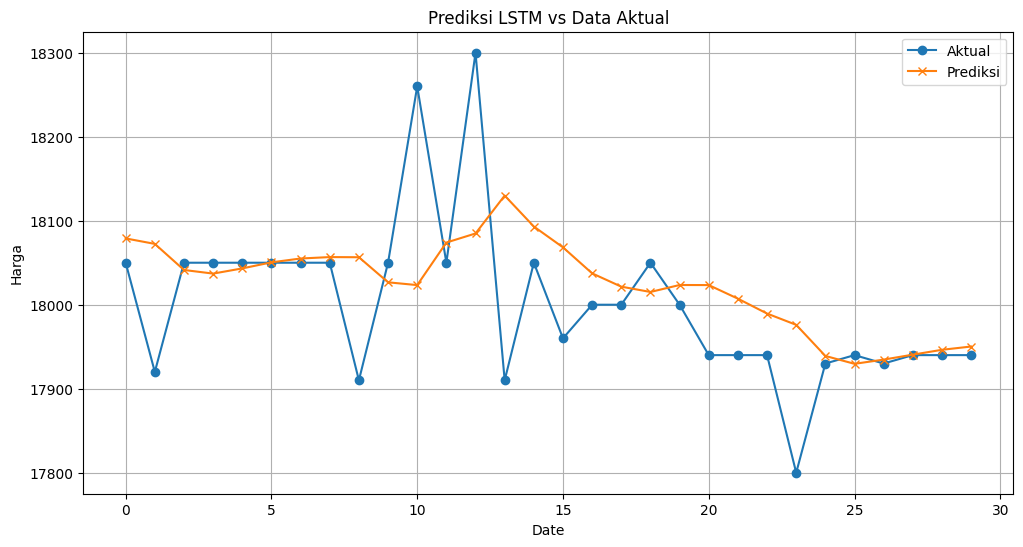

In [259]:
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label="Aktual", marker="o")
plt.plot(y_pred_rescaled, label="Prediksi", marker="x")
plt.title("Prediksi LSTM vs Data Aktual")
plt.xlabel("Date")
plt.ylabel("Harga")
plt.legend()
plt.grid(True)
plt.show()

# Save Model

In [260]:
model.save("lstm_model.h5")